In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sizes=[10,100,500,1000,10000]

In [3]:
%matplotlib inline


In [4]:
plt.figure(figsize=(10,6))
for s in sizes:
    plt.semilogy(np.load("c5u"+str(s) + ".npy"), label=str(s))
plt.legend()
plt.xlabel("Epocas")
plt.ylabel("Log de error cuadrático medio")
plt.savefig("loss_plot.png")


FileNotFoundError: [Errno 2] No such file or directory: 'c5u10.npy'

<Figure size 720x432 with 0 Axes>

In [5]:
text=[
      "_________________________________________________________________\n",
      "Layer (type)                 Output Shape              Param #   \n",
      "=================================================================\n",
      "input_4 (InputLayer)         (None, 28, 28, 1)         0         \n",
      "_________________________________________________________________\n",
      "conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       \n",
      "_________________________________________________________________\n",
      "max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         \n",
      "_________________________________________________________________\n",
      "conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     \n",
      "_________________________________________________________________\n",
      "max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         \n",
      "_________________________________________________________________\n",
      "conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    \n",
      "_________________________________________________________________\n",
      "flatten_1 (Flatten)          (None, 6272)              0         \n",
      "_________________________________________________________________\n",
      "dense_3 (Dense)              (None, 84)                526932    \n",
      "_________________________________________________________________\n",
      "dropout_1 (Dropout)          (None, 84)                0         \n",
      "_________________________________________________________________\n",
      "dense_4 (Dense)              (None, 10)                850       \n",
      "=================================================================\n",
      "Total params: 784,806\n",
      "Trainable params: 784,806\n",
      "Non-trainable params: 0\n",
      "_________________________________________________________________\n"]

In [6]:
for line in text:
    print( line[:-3])

_______________________________________________________________
Layer (type)                 Output Shape              Param # 
input_4 (InputLayer)         (None, 28, 28, 1)         0       
_______________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832     
_______________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0       
_______________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264   
_______________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0       
_______________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928  
_______________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0       
________________________________________

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


units=[10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 780, 790]
#units=[500,780,790,1000,5000]#,10000]



n_exp=5


terminal=[]
un=[]
n_epochs=100
folder="exp3/"

data={}
for c,hidden_units in enumerate(units):
    arrs=[]
    for i in range(n_exp):
        arr=np.load(folder+"c5u"+str(hidden_units)+"-"+str(i)+".npy")    
        if len(arr) > n_epochs:
            arr=arr[:n_epochs]
        arrs.append(arr)
    print(arr.shape,i,hidden_units)
    loss=np.mean(arrs,axis=0)
    terminal.append(loss[-1])
    un.append(hidden_units)

    data[str(hidden_units)]=loss
        
        

(100,) 4 10
(100,) 4 50
(100,) 4 100
(100,) 4 150
(100,) 4 200
(100,) 4 250
(100,) 4 300
(100,) 4 350
(100,) 4 400
(100,) 4 450
(100,) 4 500
(100,) 4 780
(100,) 4 790


<Figure size 720x432 with 0 Axes>

100
100
100
100
100
100
100
100
100
100
100
100
100


C:\Users\PC\.conda\envs\tensorflow-probability\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  


(1.5807823260272605e-28, 1)

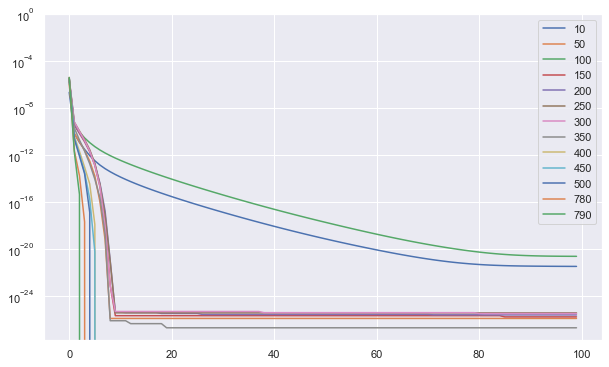

In [76]:
plt.figure(figsize=(10,6))
for key,value in data.items():
    plt.semilogy(value,label=key)
    print(len(value))
plt.legend()
plt.ylim((-0.1, 1))

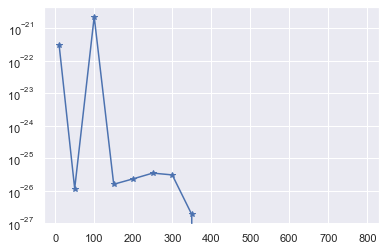

In [80]:
plt.semilogy(un,terminal,marker="*")